In [ ]:
'''
This script uses the SamenvoegenCSV_metermonitoring dataset (xlsx format)
and the Bezetting kantoren bij heropstart - Gent dataset (xlsx format)
It evaluates the relation between number of cars charging and total power consumption
Scatterplot and curve fitting are used for this purpose
'''

In [ ]:
import numpy as np
import datetime as dt
import sklearn
import pandas as pd
from sklearn import preprocessing 

In [2]:
# read data

df = pd.read_excel (r'Data/SamenvoegenCSV_metermonitoring.xlsx')
X=df.copy()

In [4]:
# select power format of data


df_power = X[X['Extra info'] =="Actief vermogen totaal"]


In [6]:
# sum powers of circuits of same timestamp
# skip the first timestamp as it is a sample reading


indices=df_power.index.values

list_of_dates=[]
list_of_total_power=[]

counter=0
total_power=0
for i in range(4,len(indices)):
    counter=counter+1
    total_power=total_power+df_power.loc[indices[i]]["Meetwaarde"]
    if counter==4:
        counter=0
        list_of_total_power.append(total_power)
        total_power=0
        list_of_dates.append(df_power.loc[indices[i]]["Tijdstip"])

In [7]:
# group data per hour (sum and count)


from datetime import datetime

power_date_dict = {}
power_date_dict_we = {}


for i in range(len(list_of_dates)):
    date_time=list_of_dates[i]
    curr_date=date_time.date()
    curr_hour=date_time.hour
    weekno = date_time.weekday()
    dict_to_use=power_date_dict
    if weekno > 4:
        dict_to_use=power_date_dict_we
    curr_key=(curr_date,curr_hour)
    if curr_key in dict_to_use:
        dict_to_use[curr_key][0]=dict_to_use[curr_key][0]+list_of_total_power[i]
        dict_to_use[curr_key][1]=dict_to_use[curr_key][1]+1
    else:
        dict_to_use[curr_key]=[list_of_total_power[i],1]

In [33]:
# reformat to get average (sum/count)


list_of_dates=[]
list_of_powers=[]
for key in power_date_dict:
    list_of_dates.append(key)
list_of_dates=sorted(list_of_dates)
for key in list_of_dates:
    value=power_date_dict[key]
    list_of_powers.append(value[0]/(1000*value[1]))
    power_date_dict[key][0]=value[0]/(1000*value[1])
    power_date_dict[key][1]=1
    
list_of_dates_we=[]
list_of_powers_we=[]
for key in power_date_dict_we:
    list_of_dates_we.append(key)
list_of_dates_we=sorted(list_of_dates_we)
for key in list_of_dates_we:
    value=power_date_dict_we[key]
    list_of_powers_we.append(value[0]/(1000*value[1]))

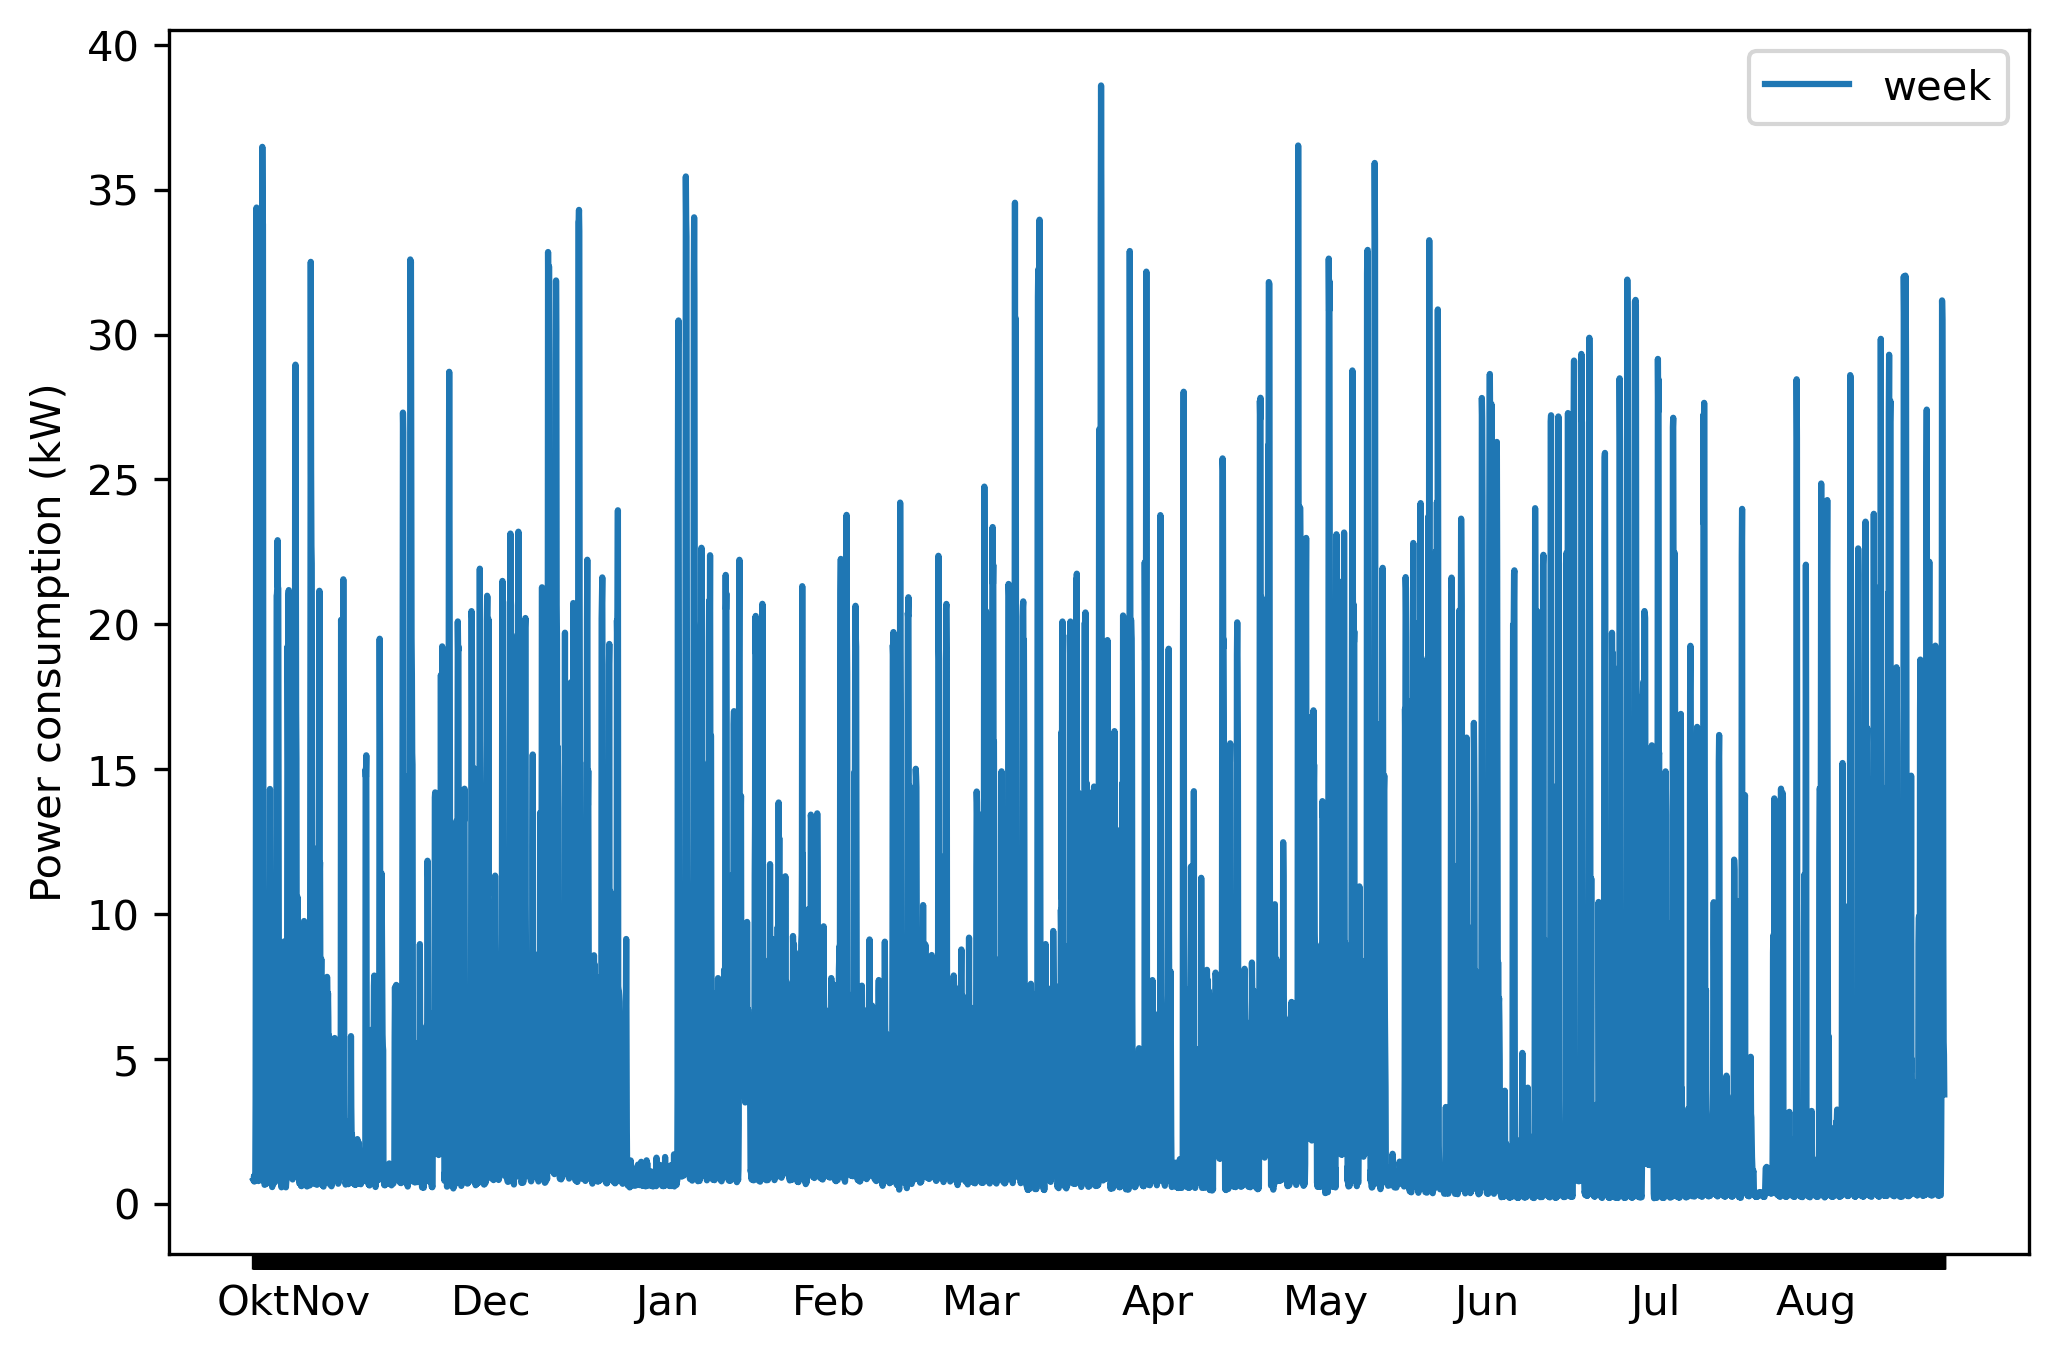

In [9]:
# plot power grouped per hour week

import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure

x_labels=[]

current_month=-1

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date_hour in list_of_dates:
    date=date_hour[0]
    if date.month != current_month:
        current_month=date.month
        x_labels.append(months[date.month-1])
    else:
        x_labels.append("")
        
        
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(list_of_dates)), list_of_powers,label = "week")
plt.xticks((range(len(list_of_dates))), x_labels)
plt.ylabel('Power consumption (kW)')
plt.legend()
plt.savefig(os.path.join('average power consumption per hour week.png'), dpi=300, format='png')

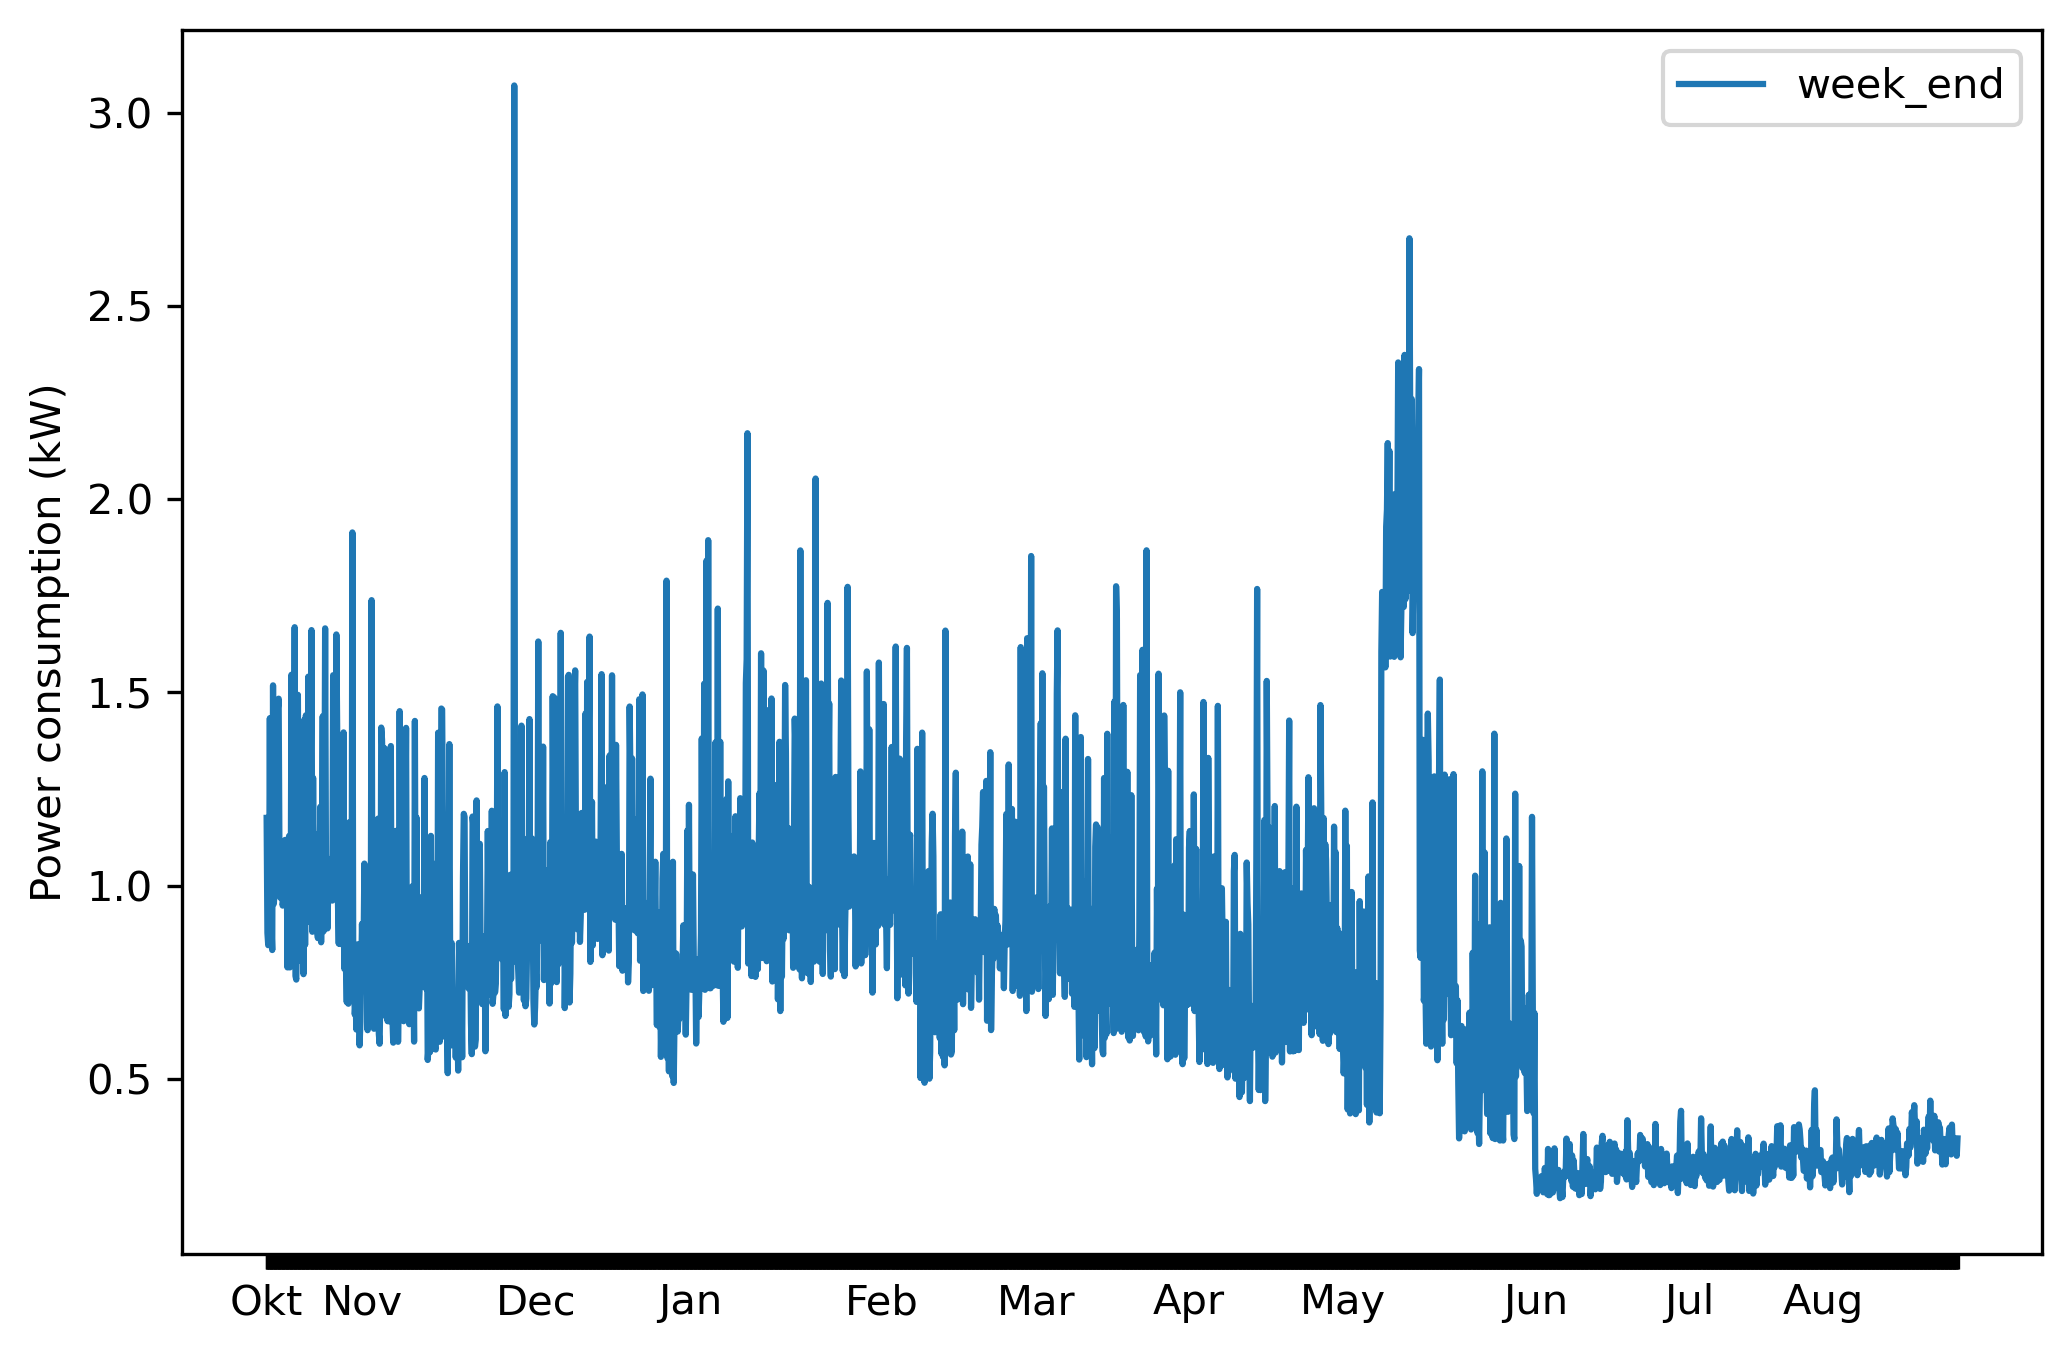

In [10]:
# plot power grouped per hour weekend



import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure


x_labels=[]

current_month=-1

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date_hour in list_of_dates_we:
    date=date_hour[0]
    if date.month != current_month:
        current_month=date.month
        x_labels.append(months[date.month-1])
    else:
        x_labels.append("")
        
        
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(list_of_dates_we)), list_of_powers_we,label = "week_end")
plt.ylabel('Power consumption (kW)')

plt.xticks((range(len(list_of_dates_we))), x_labels)
plt.legend()
plt.savefig(os.path.join('average power consumption per day weekend.png'), dpi=300, format='png')

In [11]:
# read data occupancy rate


df_charge_beh = pd.read_excel(r'Data/EV Charging behaviours - Gent.xlsx')
X_charging=df_charge_beh.copy()


In [14]:
# group data per hour (sum and count)


X_start_end=X_charging[['Start','Eind']]

from datetime import date, timedelta

sum=0

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)




charge_date_dict = {}
charge_date_dict_we = {}

for row in X_start_end.iterrows():
        start=row[1][0]
        end=row[1][1]

        start_hour=row[1][0].hour
        end_hour=row[1][1].hour

        for curr_date in daterange(start.date(), end.date()+ timedelta(days=1)):
            weekno = curr_date.weekday()
            dict_to_use=charge_date_dict
            if weekno > 4:
                dict_to_use=charge_date_dict_we

            if curr_date==start.date():
                start_iter=start_hour
            else:
                start_iter=0
            if curr_date==end.date():
                end_iter=end_hour
            else:
                end_iter=23 

            for hour in range(start_iter,end_iter+1):
                sum+=1
                curr_key=(curr_date,hour)
                if curr_key in dict_to_use:
                    dict_to_use[curr_key]=dict_to_use[curr_key]+1
                else:
                    dict_to_use[curr_key]=1
print(sum)

3853


In [15]:
''' sanity check

sum =0
for key in charge_date_dict:
    #print(key)
    value=charge_date_dict[key]
    sum=sum+value
    
for key in charge_date_dict_we:
    #print(key)
    value=charge_date_dict_we[key]
    sum=sum+value
    
print(sum)
'''

' sanity check\n\nsum =0\nfor key in charge_date_dict:\n    #print(key)\n    value=charge_date_dict[key]\n    sum=sum+value\n    \nfor key in charge_date_dict_we:\n    #print(key)\n    value=charge_date_dict_we[key]\n    sum=sum+value\n    \nprint(sum)\n'

In [16]:
# reformat to get average (sum/count)


list_of_dates2=[]
list_of_values=[]
for key in charge_date_dict:
    list_of_dates2.append(key)
list_of_dates2=sorted(list_of_dates2)
for key in list_of_dates2:
    value=charge_date_dict[key]
    list_of_values.append(value)
    
list_of_dates_we2=[]
list_of_values_we=[]
for key in charge_date_dict_we:
    list_of_dates_we2.append(key)
list_of_dates_we2=sorted(list_of_dates_we2)
for key in list_of_dates_we2:
    value=charge_date_dict_we[key]
    list_of_values_we.append(value)

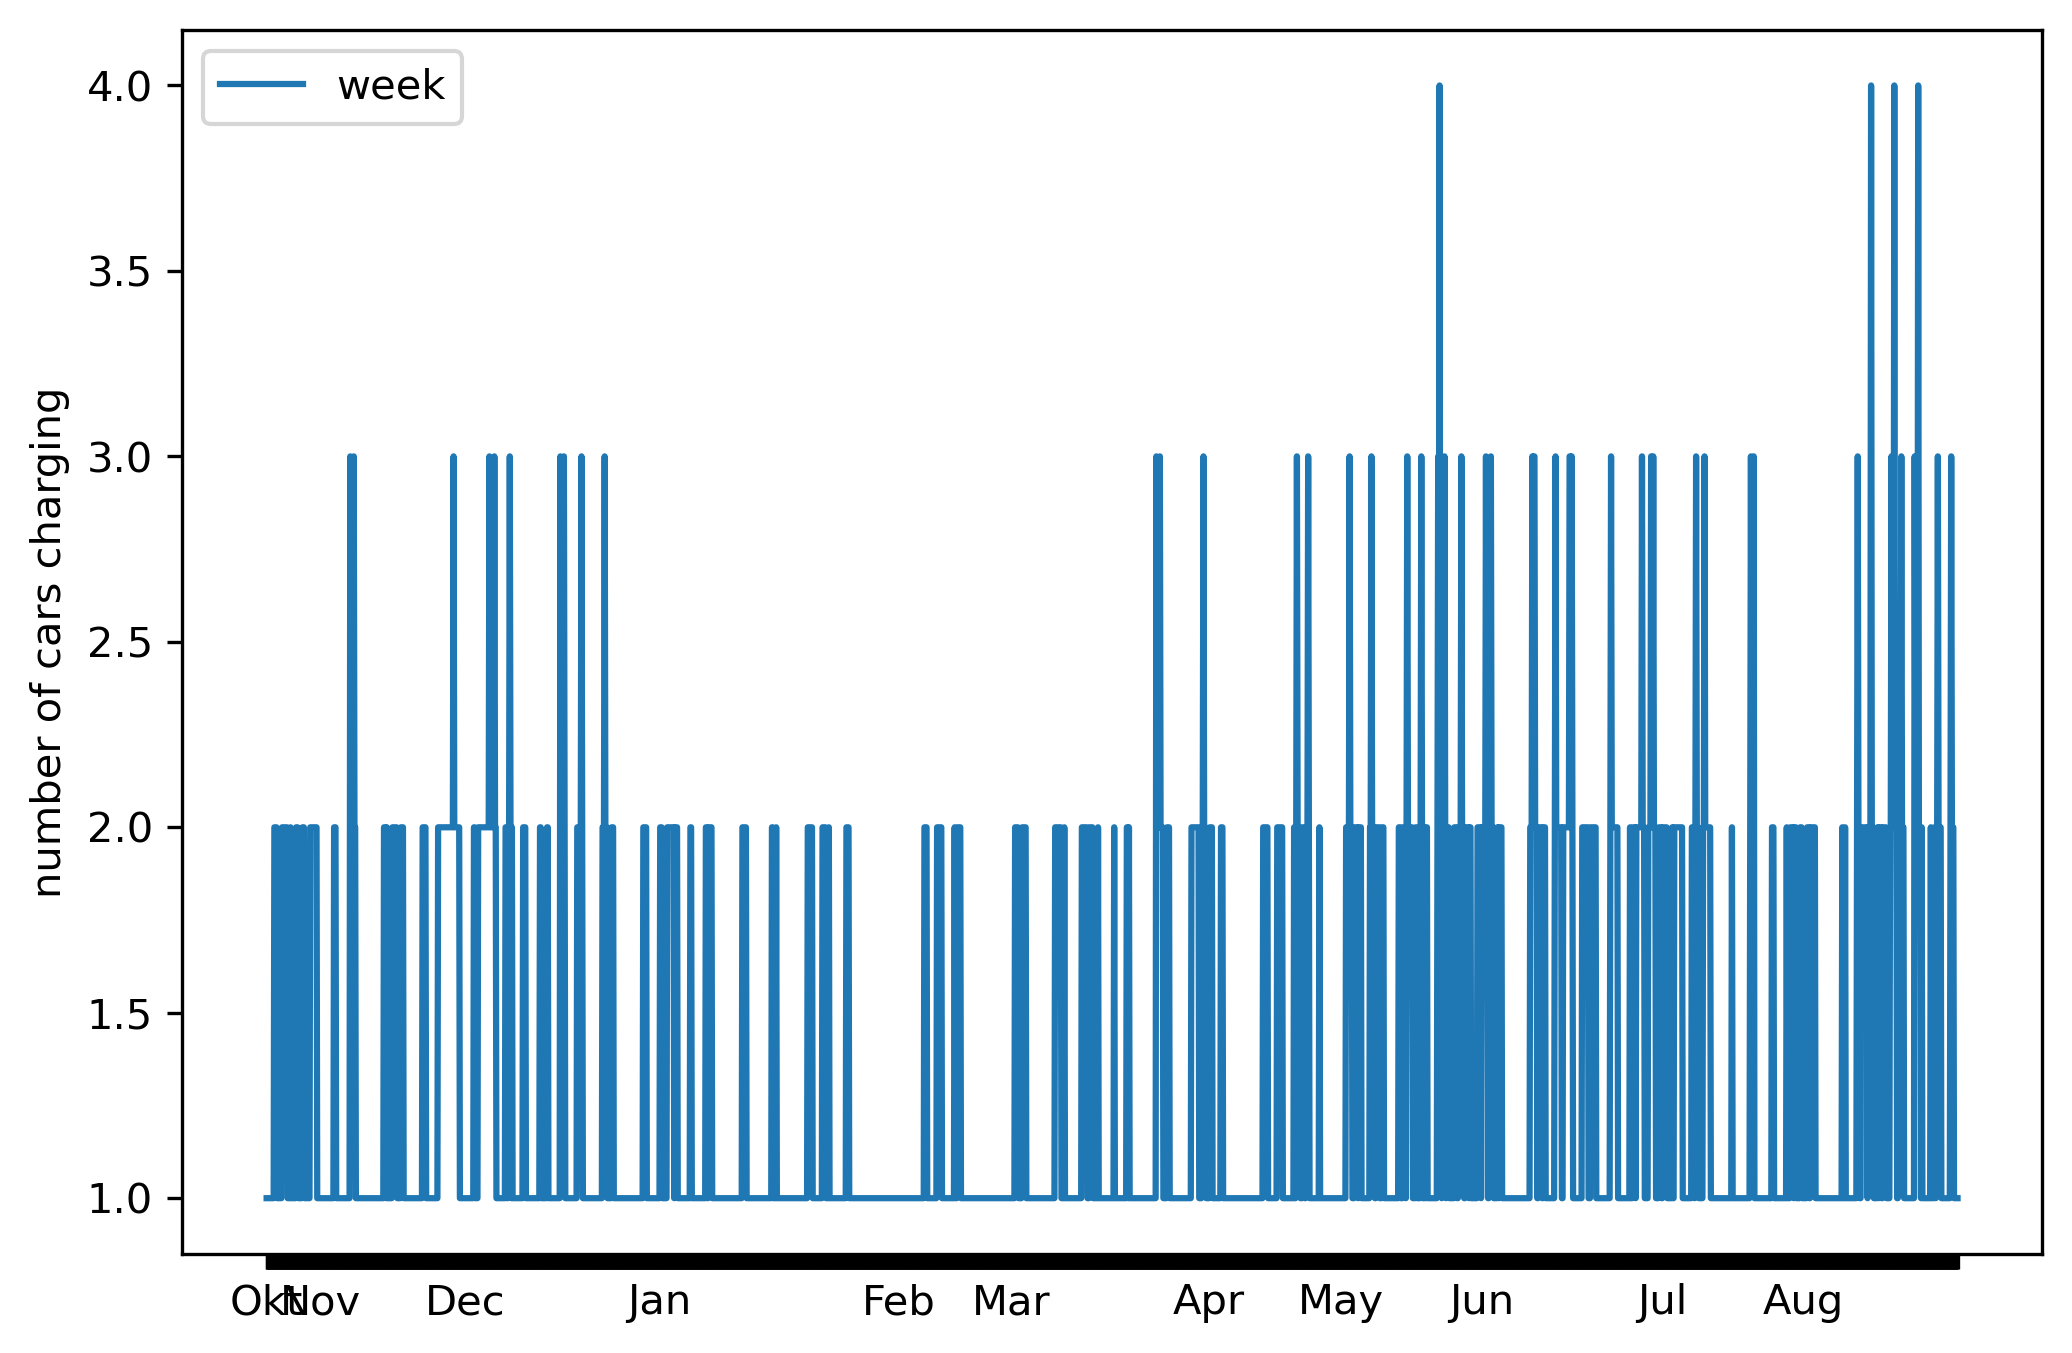

In [18]:
# plot occupancy rate per hour


import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure


x_labels2=[]

current_month=-1

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date_hour in list_of_dates2:
    date=date_hour[0]
    if date.month != current_month:
        current_month=date.month
        x_labels2.append(months[date.month-1])
    else:
        x_labels2.append("")
        
        
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(list_of_dates2)), list_of_values,label = "week")
plt.ylabel('number of cars charging')

plt.xticks((range(len(list_of_dates2))), x_labels2)
plt.legend()
plt.savefig(os.path.join('number of cars charging.png'), dpi=300, format='png')

In [19]:
# reformat to dictionary


charge=[]
powr=[]
intersection_dates=[]


summary_dict={}

for key in power_date_dict.keys():
    nb_cars=0
    curr_pow=power_date_dict[key][0]
    if key in charge_date_dict:
        nb_cars=charge_date_dict[key]
    charge.append(nb_cars)
    powr.append(curr_pow)
    if nb_cars in summary_dict:
        summary_dict[nb_cars][0]+=curr_pow
        summary_dict[nb_cars][1]+=1
    else:
        summary_dict[nb_cars]=[curr_pow,1]


In [20]:
# get intersection dates and filter to within office hours


charge_within_hours=[]
powr_within_hours=[]
intersection_dates_within_hours=[]




summary_dict_within_hours={}

for key in power_date_dict.keys():
    hour=key[1]
    if hour >=7 and hour <18:
        nb_cars=0
        curr_pow=power_date_dict[key][0]
        if key in charge_date_dict:
            nb_cars=charge_date_dict[key]
        charge_within_hours.append(nb_cars)
        powr_within_hours.append(curr_pow)
        if nb_cars in summary_dict_within_hours:
            summary_dict_within_hours[nb_cars][0]+=curr_pow
            summary_dict_within_hours[nb_cars][1]+=1
        else:
            summary_dict_within_hours[nb_cars]=[curr_pow,1]

In [21]:
# print total average power conumption for different number of cars charging

avgs=[0,0,0,0,0]
print(summary_dict)

for key in summary_dict:
    avgs[key]=(summary_dict[key][0]/summary_dict[key][1])
print(avgs)

avgs=[0,0,0,0,0]
print(summary_dict_within_hours)

for key in summary_dict_within_hours:
    avgs[key]=(summary_dict_within_hours[key][0]/summary_dict_within_hours[key][1])
print(avgs)



{0: [6656.506700000008, 2925], 2: [11046.72011666667, 658], 1: [9442.073583333318, 1672], 3: [755.6130833333334, 44], 4: [71.97375, 4]}
[2.2757287863247893, 5.647173195773516, 16.788328444782174, 17.17302462121212, 17.9934375]
{0: [4433.920150000001, 955], 2: [10892.30411666667, 621], 1: [7951.110833333334, 811], 3: [755.6130833333334, 44], 4: [71.97375, 4]}
[4.642848324607331, 9.804082408549117, 17.53994221685454, 17.17302462121212, 17.9934375]


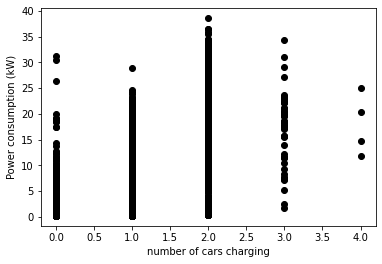

In [23]:
# scatterplot

plt.plot(charge, powr, 'o', color='black');
plt.xlabel('number of cars charging')
plt.ylabel('Power consumption (kW)')
plt.savefig(os.path.join('scatterplot2.png'), dpi=300, format='png')

In [24]:
# linear curve fit


from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

def objective(x, a, c):
    return a*x+c
popt, _ = curve_fit(objective, charge, powr)
a,c = popt
print('y = %.5f * x + %.5f' % (a, c))


y = 6.03135 * x + 1.70820


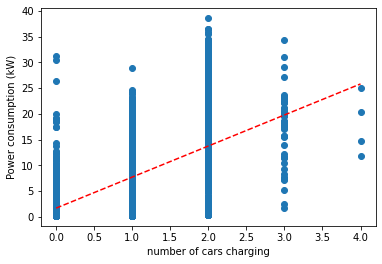

In [25]:
# plot data + linear fitted curve


pyplot.scatter(charge, powr)
x_line = arange(min(charge), max(charge)+1, 1)
y_line = objective(x_line, a, c)
pyplot.plot(x_line, y_line, '--', color='red')
plt.xlabel('number of cars charging')
plt.ylabel('Power consumption (kW)')

pyplot.savefig(os.path.join('scatterplot2 with regression.png'), dpi=300, format='png')
pyplot.show()

In [27]:
# linear curve fit within hours


from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

def objective(x, a, c):
    return a*x+c
popt, _ = curve_fit(objective, charge_within_hours, powr_within_hours)
a,c = popt
print('y = %.5f * x + %.5f' % (a, c))

y = 5.94840 * x + 4.52258


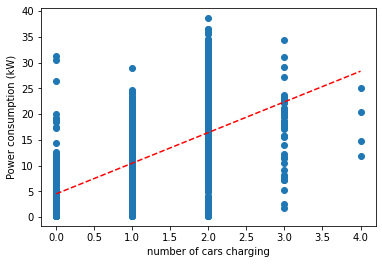

In [28]:
# plot data + linear fitted curve within hours


pyplot.scatter(charge_within_hours, powr_within_hours)
x_line = arange(min(charge_within_hours), max(charge_within_hours)+1, 1)
y_line = objective(x_line, a, c)
pyplot.plot(x_line, y_line, '--', color='red')
plt.xlabel('number of cars charging')
plt.ylabel('Power consumption (kW)')

pyplot.savefig(os.path.join('scatterplot2 with regression.png'), dpi=300, format='png')
pyplot.show()

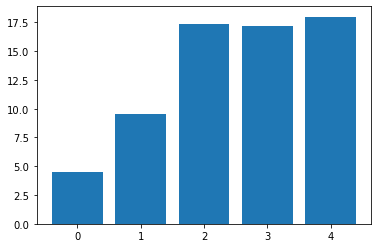

In [30]:
# bar chart from total average power conumption for different number of cars charging



import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = [4.542310967741935, 9.500930477264184, 17.377080625657207, 17.17302462121212, 17.9934375]
bars = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
pyplot.savefig(os.path.join('bar chart.png'), dpi=300, format='png')

# Show graphic
plt.show()

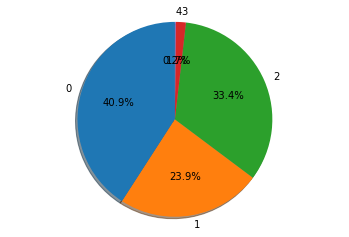

In [31]:
# pie chart of numbers of cars charging


import matplotlib.pyplot as plt

total=955+621+811+44+4

labels = '0', '1', '2', '3','4'
sizes = [1085/total, 634/total, 887/total, 44/total,4/total]
explode = (0, 0, 0, 0,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pyplot.savefig(os.path.join('pie chart.png'), dpi=300, format='png')

plt.show()